<a href="https://colab.research.google.com/github/marcelounb/tensorflow_udacity/blob/master/08_testando_sazonalidades_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [3]:
def trend(time, slope=0):
  return time*slope

In [12]:
time = np.arange(4 * 365 + 1)  # Cria um array de um a 1461
baseline = 10
series = baseline + trend(time, 0.1)  # Cria um array de tamanho 1461 que vai de  10.0 a 156.0 incrementando de 0.1 em 0.1

In [10]:
print(time.size)
print(time)

1461
[   0    1    2 ... 1458 1459 1460]


In [11]:
print(series.size)
print(series)

1461
[ 10.   10.1  10.2 ... 155.8 155.9 156. ]


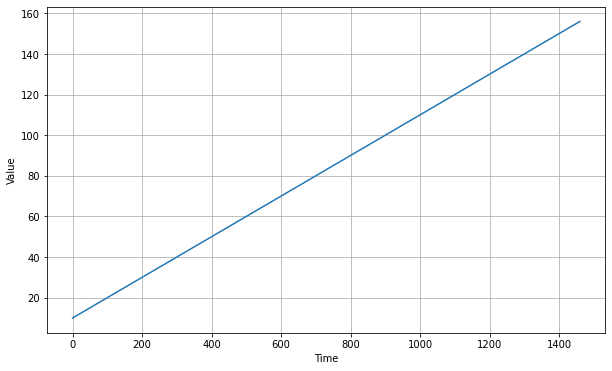

In [13]:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [16]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.8,
                    np.cos(season_time * 1.086 * np.pi),
                    1 / np.exp(2.505 * (season_time/1.54)))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

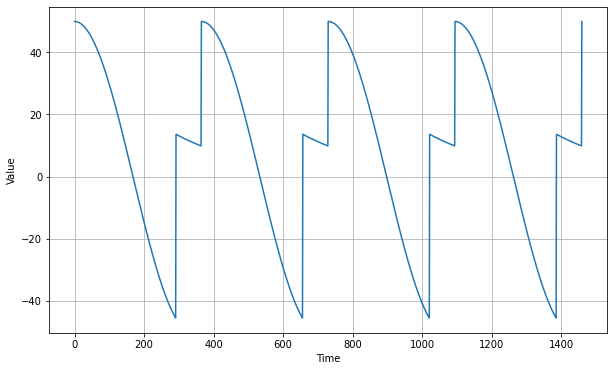

In [17]:
amplitude = 50
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

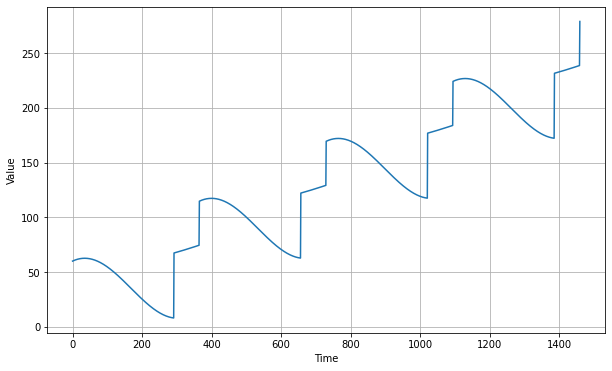

In [18]:
slope = 0.15
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()